In [1]:
!pip install transformers tokenizers sentencepiece protobuf huggingface_hub accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 164.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 kB 143.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 71515, done.
remote: Counting objects: 100% (9769/9769), done.
remote: Compressing objects: 100% (803/803), done.
remote: Total 71515 (delta 9456), reused 9018 (delta 8944), pack-reused 61746 (from 1)
Receiving objects: 100% (71515/71515), 49.78 MiB | 9.45 MiB/s, done.
Resolving deltas: 100% (53031/53031), done.
Updating files: 100% (1581/1581), done.


In [3]:
!pip install ./diffusers

Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2799836 sha256=4098b3834542d314c6615ab99588701979a31dfdb047583f6ccfaae05bd847ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-i9adqztf/wheels/47/b1/28/98902d05eddc64208d6a467cad03b9f75d3644537ecb576eb4
Successfully built diffusers

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [ ]:
## Tests
1. Run the default config and verify that its working as intended
2. Run cfg and see its updating the batch size to 2
3. Run cfg++ and see its updating the batch size to 2 and scale is b/w 0 and 1
4. Run APG and sweep the hyperparams.
5. Run APG-sample and instead use it on predicted sample rather than noise
6. Run SEG, implement the SEG attn processor.

In [4]:
from huggingface_hub import notebook_login
notebook_login()

In [1]:
import torch
from pipeline_flux import FluxPipeline
from transformer_flux import FluxTransformer2DModel
# For SEG, modify the attn processor to handle AFG, SEG, CFG++ etc
transformer = FluxTransformer2DModel.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16, subfolder='transformer')
pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16, transformer=transformer)
pipe.to('cuda')

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "transformer_flux",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [12]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image_base = pipe(
    prompt,
    height=512,
    width=512,
    guidance_scale=3.5,
    num_inference_steps=28,
    max_sequence_length=512,
    generator=torch.Generator("cuda").manual_seed(0),
    debug=False,
    compile=False,
    guidance_mode='seg',
    # guidance_weight=2,
    # apg_eta=1.0,
    # apg_momentum=-0.75,
    # apg_r=2.5,
    seg_blur_sigma = 10,
    seg_inf_blur_threshold = 9999.0,
    seg_guidance_weight = 2
).images[0]

  0%|          | 0/28 [00:00<?, ?it/s]

guidance_mode, seg params seg 10 9999.0
hidden states torch.Size([2, 1024, 3072])
E query_ptb shape torch.Size([1, 24, 512, 128])
E query_ptb shape after reshape torch.Size([1, 3072, 32, 16])
E query_ptb shape after op torch.Size([1, 3072, 32, 16])
guidance_mode, seg params seg 10 9999.0
hidden states torch.Size([2, 1024, 3072])
E query_ptb shape torch.Size([1, 24, 512, 128])
E query_ptb shape after reshape torch.Size([1, 3072, 32, 16])
E query_ptb shape after op torch.Size([1, 3072, 32, 16])
guidance_mode, seg params seg 10 9999.0
hidden states torch.Size([2, 1024, 3072])
E query_ptb shape torch.Size([1, 24, 512, 128])
E query_ptb shape after reshape torch.Size([1, 3072, 32, 16])
E query_ptb shape after op torch.Size([1, 3072, 32, 16])
guidance_mode, seg params seg 10 9999.0
hidden states torch.Size([2, 1024, 3072])
E query_ptb shape torch.Size([1, 24, 512, 128])
E query_ptb shape after reshape torch.Size([1, 3072, 32, 16])
E query_ptb shape after op torch.Size([1, 3072, 32, 16])
guid

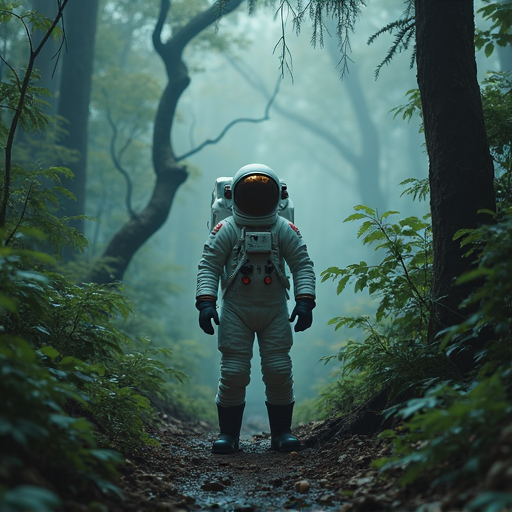

In [13]:
image_base 

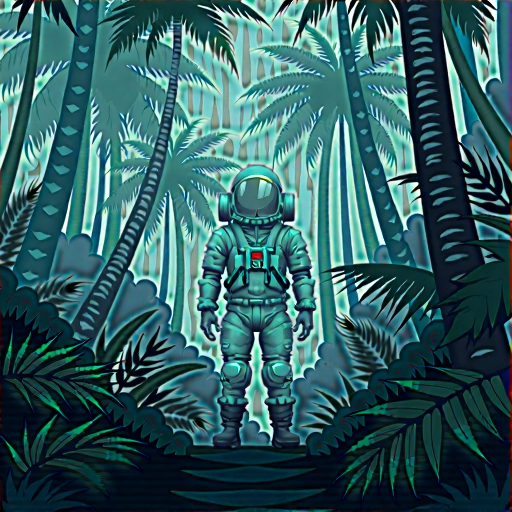

In [7]:
image_base #seg 3 inf

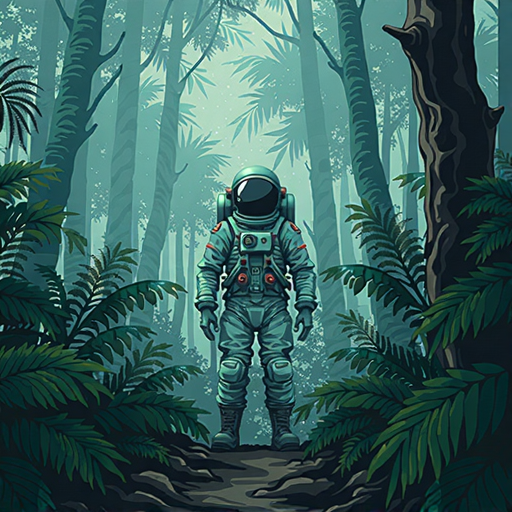

In [9]:
image_base #seg 2 inf

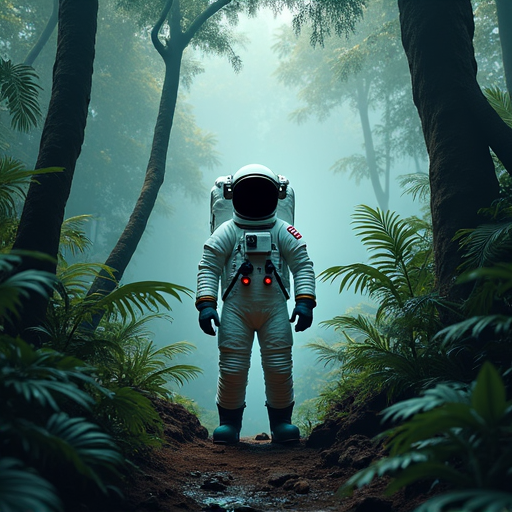

In [11]:
image_base #cfg 2

In [8]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image_base = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=28,
    max_sequence_length=512,
    generator=torch.Generator("cuda").manual_seed(0),
    debug=False,
    compile=False,
    # guidance_mode='cfg',
    # guidance_weight=2.5,
    # apg_eta=1.0,
    # apg_momentum=-0.75,
    # apg_r=2.5,
).images[0]

image_cfg = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=28,
    max_sequence_length=512,
    generator=torch.Generator("cuda").manual_seed(0),
    debug=False,
    compile=False,
    guidance_mode='cfg',
    guidance_weight=2.5,
    # apg_eta=1.0,
    # apg_momentum=-0.75,
    # apg_r=2.5,
).images[0]

image_afg = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=28,
    max_sequence_length=512,
    generator=torch.Generator("cuda").manual_seed(0),
    debug=False,
    compile=False,
    guidance_mode='apg',
    guidance_weight=20,
    apg_eta=0.0,
    apg_momentum=-0.75,
    apg_r=2.5,
).images[0]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
batch size 2
latents shape torch.Size([2, 4096, 64]),
txt_ids, torch.Size([512, 3]),
img_ids torch.Size([4096, 3]),
guidance torch.Size([2])
timesteps torch.Size([50]),
prompt_embeds torch.Size([2, 512, 4096]),
pooled torch.Size([2, 768])

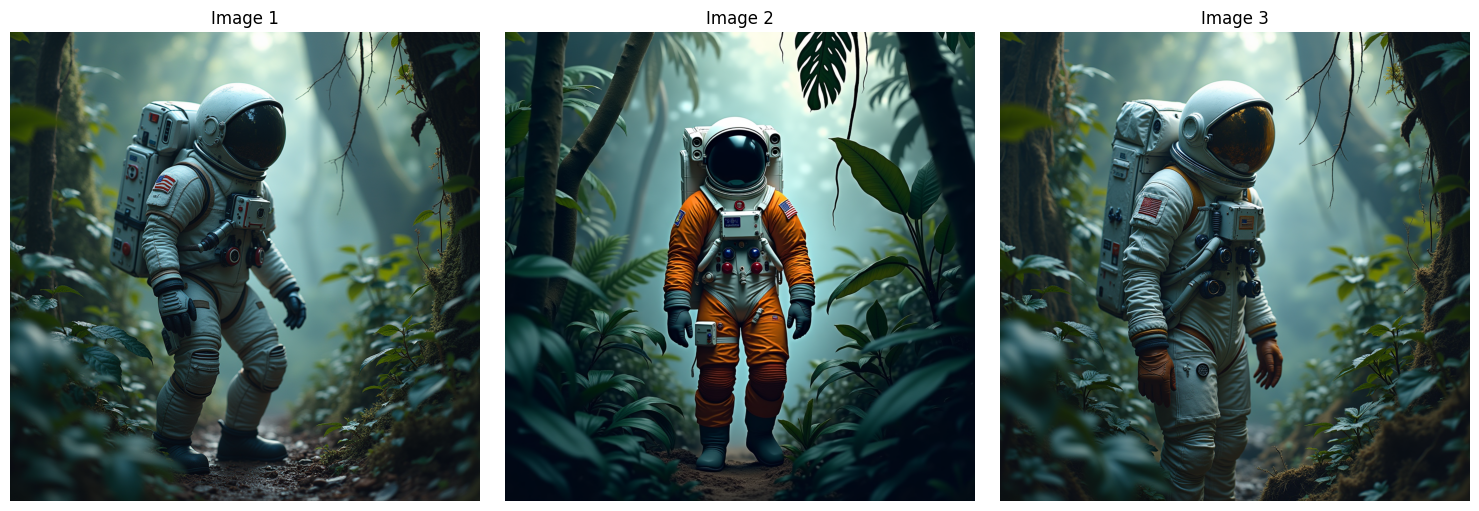

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your images
img1 = image_base
img2 = image_cfg
img3 = image_afg

# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15,5))  # 1 row, 3 columns

# Plot each image on a separate axis
axes[0].imshow(img1)
axes[0].axis('off')  # Hide the axis
axes[0].set_title("Image 1")

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title("Image 2")

axes[2].imshow(img3)
axes[2].axis('off')
axes[2].set_title("Image 3")

# Display the images
plt.tight_layout()
plt.show()
